# AI project 5

## load from file

In [6]:
import pandas as pd

file_path = ('./archive-3/Base.csv')

raw_data = pd.read_csv(file_path)

# data preprocess

## seeing raw data infos

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

## droping nans and seeing infos

In [8]:
data = raw_data.dropna()

threshold = len(data) * 0.4
data = data.dropna(thresh=threshold, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

## finding categorical columns

In [9]:
# witch columns are categorical
categorical_columns = data.select_dtypes(include=['object']).columns

categorical_columns

Index(['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'],
      dtype='object')

### switching them with numericals

In [10]:
# data[categorical_columns] = data[categorical_columns].apply(lambda x: x.astype('category').cat.codes)
# print(data[categorical_columns])


# or we can do this with labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data[categorical_columns] = data[categorical_columns].apply(lambda x: labelencoder.fit_transform(x))

data[categorical_columns]


,payment_type,employment_status,housing_status,source,device_os
0,0,1,2,0,0
1,3,0,2,0,2
2,1,0,2,0,3
3,1,0,2,0,0
4,0,0,2,0,2
...,...,...,...,...,...
999995,1,0,1,0,2
999996,2,0,0,0,1
999997,0,0,4,0,2
999998,1,0,3,0,0


# making x/y

In [11]:
target = 'fraud_bool'

X = data.drop(target, axis=1)
y = data[target]

## making more samples

In [12]:
# using smote to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()

print(y.value_counts())


X_smote, y_smote = smote.fit_resample(X, y)

X = X_smote
y = y_smote

print(y.value_counts())

fraud_bool
0    988971
1     11029
Name: count, dtype: int64
fraud_bool
0    988971
1    988971
Name: count, dtype: int64


## scaling x

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# applying k-means

## reducing to 2 demansion using PCA

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
X2d = pca.transform(X)

## applying k-means

In [15]:
from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters=2)
Kmeans.fit_predict(X2d)

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

### showing k-means using matplotlib

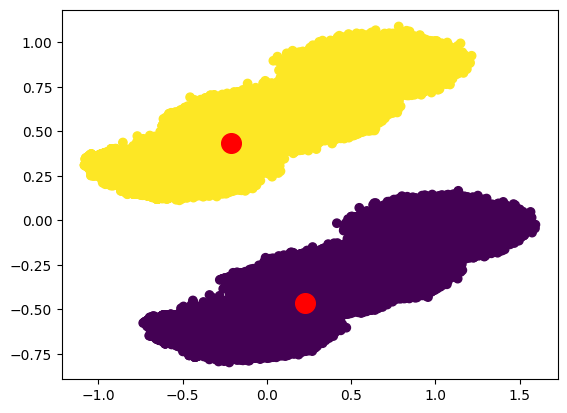

In [16]:
import matplotlib.pyplot as plt

plt.figure('K-means with 3 clusters')
plt.scatter(X2d[:, 0], X2d[:, 1], c=Kmeans.labels_)
centeres = Kmeans.cluster_centers_
plt.scatter(centeres[:, 0], centeres[:, 1], s=200, marker='o', c='red')
plt.show()

## seeing if k-means is efective

### scores:

In [17]:
# measure k-means performance f1 and accuracy and precision and recall
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

f1 = f1_score(y, Kmeans.labels_, average='weighted')
accuracy = accuracy_score(y, Kmeans.labels_)
precision = precision_score(y, Kmeans.labels_, average='weighted')
recall = recall_score(y, Kmeans.labels_, average='weighted')

print(f1, accuracy, precision, recall)

0.5439628818487401 0.5440745987496094 0.5441178295042048 0.5440745987496094


### changing labels to see if its efective

In [18]:
# reverse k-means labels
Kmeans.labels_ = [0 if x == 1 else 1 for x in Kmeans.labels_]
# measure k-means performance f1 and accuracy and precision and recall
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

f1 = f1_score(y, Kmeans.labels_, average='weighted')
accuracy = accuracy_score(y, Kmeans.labels_)
precision = precision_score(y, Kmeans.labels_, average='weighted')
recall = recall_score(y, Kmeans.labels_, average='weighted')

print(f1, accuracy, precision, recall)

0.4557920848616846 0.45592540125039055 0.4558821704957952 0.45592540125039055


### using silhouete algorithm

In [19]:
# # calculate if k-means is efective
# from sklearn.metrics import silhouette_score

# silhouette_score(X, Kmeans.labels_)

## splitting test and train

### making data smaller because of high time

In [20]:
from sklearn.model_selection import train_test_split

Xs, _, ys, _ = train_test_split(X, y, test_size=0.975)

### making test and train

In [21]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.3)

In [22]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# applying lazypredict

In [23]:
# Use lazypredict to train and evaluate various models
from lazypredict.Supervised import LazyClassifier


clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 97%|█████████▋| 28/29 [02:41<00:03,  3.06s/it]

[LightGBM] [Info] Number of positive: 17349, number of negative: 17264
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 34613, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501228 -> initscore=0.004911
[LightGBM] [Info] Start training from score 0.004911


100%|██████████| 29/29 [02:42<00:00,  5.59s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.83               0.83     0.83      0.83   
LGBMClassifier                     0.83               0.83     0.83      0.83   
LabelPropagation                   0.82               0.82     0.82      0.82   
AdaBoostClassifier                 0.82               0.82     0.82      0.82   
LabelSpreading                     0.82               0.82     0.82      0.82   
SVC                                0.82               0.82     0.82      0.82   
RandomForestClassifier             0.82               0.82     0.82      0.82   
KNeighborsClassifier               0.81               0.81     0.81      0.81   
ExtraTreesClassifier               0.81               0.81     0.81      0.81   
SGDClassifier                      0.80               0.80     0.80      0.80   
BaggingClassifier           

# knn

## making train and test

In [24]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## applying pca

In [25]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1384559, 2) (593383, 2) (1384559,) (593383,)


## applying knn

In [26]:
# applying knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82    296541
           1       0.81      0.84      0.82    296842

    accuracy                           0.82    593383
   macro avg       0.82      0.82      0.82    593383
weighted avg       0.82      0.82      0.82    593383



## cross validation using knn

### appling pca on x for crossvalidation

In [27]:
pca = PCA(n_components=2)
X2d = pca.fit_transform(X)

### cross validation

In [28]:
# cross validation with Nearest centroid
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf, X2d, y, cv=5)
print(scores)
print(scores.mean())

[0.80477465 0.82345566 0.80172806 0.81437758 0.79298411]
0.8074640139588108


# applying neuralnetwork in seperate format

In [29]:
# applying noralnetwork
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83    296541
           1       0.83      0.83      0.83    296842

    accuracy                           0.83    593383
   macro avg       0.83      0.83      0.83    593383
weighted avg       0.83      0.83      0.83    593383

